# Gosh the Golemity

By [Joshua M. Moore](mailto:moore.joshua@pm.me)<br>
On July 29th, 2020

In this notebook, I try to build smarter golems. It is comprised of five parts, progressively building on each other.

1. The Gene
2. Parsing: An Interlude
3. The Golem
4. The Selection
5. Visualization

## 1 - The Gene

In [1]:
var {performance} = require('perf_hooks');
var peg = require('pegjs');
var fs = require('fs');
var g = fs.readFileSync('./node_modules/pegjs/examples/javascript.pegjs', 'utf8');
var parser = peg.generate(g, {
  cache: true
})
var copy = x => parseFloat(x);

var Gene = class Gene {
  constructor(code){
    this.code = code;
    this.cost = Infinity;
    this.calcCost();
  }
  
  cross(other){
    var middle = Math.round(Math.floor(this.code.length/2));
    var one = new Gene([
      this.code.substring(0, middle), 
      other.code.substring(middle)
    ].join(''));
    
    middle = Math.round(Math.floor(other.code.length/2));
    var two = new Gene([
      other.code.substring(0, middle),
      this.code.substring(middle),
    ].join(''));
    
    return [one, two];
  }
  
  randomCross(other, slide=0.5){
    var makeScaled = 
        (xmin, xmax, ymax) =>
          (x) => 
            ((x - xmin) / (xmax - xmin))*ymax;
    
    var scaledOne = makeScaled(0, this.code.length, other.code.length);
    var scaledTwo = makeScaled(0, other.code.length, this.code.length);
    
    return new Gene([...this.code].map(
      (c, i) => Math.random() < slide ? 
        this.code[Math.round(scaledOne(i))] : 
        other.code[Math.round(scaledTwo(i))]
    ).join(''))
  }
  
  mutate(by=1.0){
    this.code = String.fromCharCode.apply(String, [...this.code].map((c, i) => {
      var cc = this.code.charCodeAt(i);
      
      var howMuch = Math.round(by * Math.random() * (126 - 32));
      
      cc -= howMuch;
      
      if(cc < 32){
        cc = 126 - (32 - cc);
      }
      
      return cc;
    }))
    
    this.calcCost();
    
    return this;
  }
  
  calcCost(chromosomeCost=Gene.defaultChromosomeCost){
    this.cost = [...this.code].reduce((total, c, i) => total + chromosomeCost(c, i), 0);
    return this;
  }
  
  static defaultChromosomeCost(c, i){
    var t0;
    try{
      t0 = performance.now();
      parser.parse(this.code);
    }catch(e){
    }finally{
      return performance.now() - t0;
    }
  }
  
  copy(){
    return new Gene(this.code);
  }
}

In [2]:
var gene = new Gene("Hello")
gene

Gene { code: 'Hello', cost: 1.0040319971740246 }

In [3]:
var gene2 = new Gene("World")
gene2

Gene { code: 'World', cost: 0.5099110007286072 }

In [4]:
gene.randomCross(gene2)

Gene { code: 'Herld', cost: 0.4917840026319027 }

This, just with syllables would be killer, and might try to explain on a toy example, shifts in language, although that probably requires the Golems writing their own standard for beauty... What if the golems got to just pick a random evaluation function, by which they rank each other? A popularity contest.

Sounds like a LISP might be in order.

In [5]:
var gene3 = new Gene('Ronald Marshall Moore');
var gene4 = new Gene('Susanne Ute Dressel');

In [6]:
gene5 = gene3.randomCross(gene4)

Gene { code: 'Rusaldd te Dhalel M', cost: 1.8083890080451965 }

Here are fifty variations: 

In [7]:
var count = 25;
gene5 = new Gene('Joshua Marshall Moore')

do{
  gene5.mutate(0.012)
  console.log(gene5)
  
  count--;
}while(count > 0);

console.log(count)

Gene { code: 'Jnshu`}Marrh`kl Mnoqd', cost: 2.688234992325306 }
Gene { code: 'Jnrht`}Laqrh_kk Lmnpc', cost: 4.264780003577471 }
Gene { code: 'Imrgs_|L`qqh_kj}Kmmpc', cost: 1.5325919911265373 }
Gene { code: 'Ilrgs_{L_qpg_ki}Jmmob', cost: 1.828418992459774 }
Gene { code: 'Hkqfr_zK^ppg^ji|Jllob', cost: 1.456225000321865 }
Gene { code: 'Gjpeq_yJ]pof]jh|Ikloa', cost: 1.5540629960596561 }
Gene { code: 'Fjoep^yI]one]jg|Ikln`', cost: 1.3652869947254658 }
Gene { code: 'Ejoep^xI]nme\\jg|Hkkm_', cost: 1.3872790075838566 }
Gene { code: 'Dioep^wH]mld\\if{Hjjl_', cost: 3.652544017881155 }
Gene { code: 'Cindo^vH\\mlc\\iezGjjk^', cost: 1.4684109911322594 }
Gene { code: 'Bhmcn]uG[llc[heyGiik]', cost: 1.3858040049672127 }
Gene { code: 'Ahlbn]tF[llbZgdxFhik\\', cost: 2.6089999936521053 }
Gene { code: '@gkbm\\tEZlkaZfdwEgij[', cost: 1.4204029962420464 }
Gene { code: '?gjal\\sDZkk`ZedwDfhiZ', cost: 1.3940169960260391 }
Gene { code: '?gi`l\\sDZkj`YddvCeghZ', cost: 6.327224999666214 }
Gene { code: '?fi_l[rCZ

## 2 - Parsing: An Interlude

In [8]:
var genome = genome = new Gene(String.fromCharCode((126 - 32) / 2).repeat(300));

// in biblical tradition, they are donts
var commandments = [
  /^\/\/.*/g
];

var count = 50;
do{
  var heed = command => command.test(genome);
  var heeded = commandments.every(heed => !heed.test(genome.code));
  
  if(heeded){
    try{
      parser.parse(genome.code);
    }catch(e){
      genome.mutate(0.5)
    }
  }else{
    genome.mutate(0.5)
  }
  
  count--;
}while(count > 0);

console.log(count, genome.code)

0 .fQz6kid4o;R>EKA!'o&`,Q&s`(SP4"p0/U6),>_?p|H*Zr.<*Rw0@dmf!taWJxtMu,bw0|6c}b($CY^IR'+>iGsop*HnsA,L?o%T ^h7`d# S8YO.z0T\LlK44| Smq,,U8]Qgo1V#Ddr>;g6J|Z^;4+$L[P&uGS9Kd+.,Y#s?pc%pPzBsQSp7gi=['[k#xDN1PP0^/4Z`Hd+5^OEu"COYenGm]r$EQy?)`4W"vHLE+?x4#U'\TvhY6`vH1u]Ht8Kc>/CZ^vr[> I@'d>*Gc`DBGWd.?$DN.xLbYUU?EH?h


Still just random, there is no feedback for selection. 

## 3 - The Golem

In [9]:
var generations = 50;

var commandments = [
  /^(?!\/\/$).*/
];

var Golem = class Golem {
  constructor(){
    this.genome = new Gene(String.fromCharCode((126 - 32) / 2).repeat(300));
    this.genome.mutate(0.02);
  }
  
  viable(){
    var error = false;
    var heed = command => command.test(genome);

    if(commandments){
      var heeded = commandments.every(heed => heed.test(genome.code));
      if(!heeded) return false;
    }
    
    try{
      var t0 = performance.now();
      parser.parse(genome.code);
    }catch(e){
      return false;
    }finally{
      return performance.now() - t0;
    }
  }
  
  mate(other){
    var child = new Golem();
    child.genome = this.genome.randomCross(other.genome);
    
    while(!child.viable()){
      child.genome.mutate(0.05);
    }
    
    return child;
  }
}

var adam = new Golem();
var eve = new Golem();
var ohigod = new Golem();

var golemity = [adam, eve, ohigod];

## 4 - The Selection

In [10]:
function ratchetStep(golem){
  var mutated = golem.genome.copy().mutate(0.25);
  
  var m;
  try{
    var m0 = performance.now();
    parser.parse(mutated);
  }catch(e){
  }finally{
    m = performance.now() - m0;
  }
  
  if(mutated.cost > golem.genome.cost){
    golem.genome = mutated;
  }
  
  return golem;
}

function byCostDesc(a, b){
  return b.genome.cost - a.genome.cost;
}

In [11]:
var indicators = ['/', '-', '\\', '|'];
var i=0;

var countdown = 15;
var POPULATION = 100;
var BIRTH = 0.68;
var DEATH = 0.15;
var RADIATION = 0.025;

var records = [];
while(countdown--){
  golemity = golemity.map(g => ratchetStep(g))
    .filter(g => g !== undefined)
    .sort(byCostDesc);
  
  // history
  var previous = records[records.length - 1];
  
  // census
  var record = {
    'i': i, 
    'population': copy(golemity.length), 
    'population_change': 0.0,
    'max_cost': copy(golemity[0].genome.cost),
    'max_cost_change': 0.0,
    'min_cost': copy(golemity[golemity.length-1].genome.cost),
    'min_cost_change': 0.0,
  };
  
  if(previous !== undefined){
    record.population_change = record.population - previous.population;
    record.max_cost_change = record.max_cost - previous.max_cost;
    record.min_cost_change = record.min_cost - previous.min_cost;
    // todo justify order
  }
  
  records.push(record);
  
  // death
  golemity = golemity.slice(
    0, 
    golemity.length - Math.floor(golemity.length * DEATH)
  )
  
  // birth
  // Come to think of it, heaven must be hella weird.
  var stepBirth = Math.floor(golemity.length * BIRTH);
  
  while(stepBirth > 0 && golemity.length < POPULATION){
    var a = Math.floor(Math.random() * golemity.length);
    var b = Math.floor(Math.random() * golemity.length);
    
    var mini = golemity[a].mate(golemity[b])
    golemity.push(mini);
    stepBirth--;
      
    process.stdout.write(`${indicators[i++%indicators.length]}\r`);
  }
  
  process.stdout.write(`${indicators[i++%indicators.length]} ${countdown} rounds remaining\r`);
}

console.table(records);
console.log(golemity[0]);

┌─────────┬─────┬────────────┬───────────────────┬────────────────────┬───────────────────┬────────────────────┬──────────────────────┐
│ (index) │  i  │ population │ population_change │      max_cost      │  max_cost_change  │      min_cost      │   min_cost_change    │
├─────────┼─────┼────────────┼───────────────────┼────────────────────┼───────────────────┼────────────────────┼──────────────────────┤
│    0    │  0  │     3      │         0         │  34.400245975703   │         0         │ 20.673215966671705 │          0           │
│    1    │  3  │     5      │         2         │  34.400245975703   │         0         │ 20.677744954824448 │ 0.004528988152742386 │
│    2    │  7  │     8      │         3         │  34.400245975703   │         0         │ 22.939981915056705 │  2.262236960232258   │
│    3    │ 12  │     11     │         3         │  34.400245975703   │         0         │ 21.109461974352598 │ -1.8305199407041073  │
│    4    │ 19  │     16     │         5        

## 5 - Visualizations

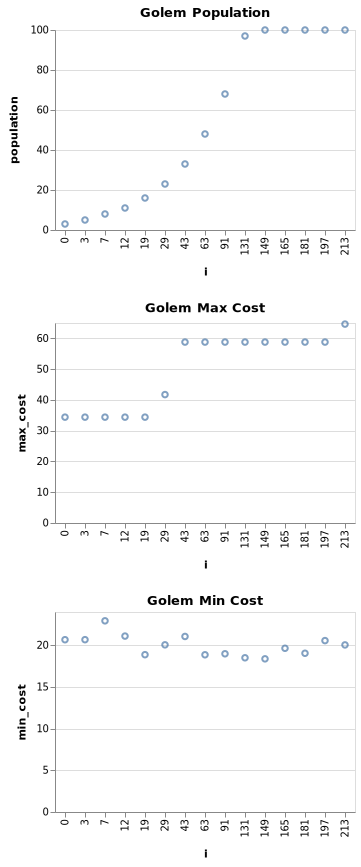

In [12]:
var {jvl} = require('jvl')
var spec = {
  vconcat: [{
    mark: 'point',
    title: 'Golem Population',
    encoding: {
      x: {field: 'i', type: 'ordinal'},
      y: {field: 'population', type: 'quantitative'}
    }
  }, {
    mark: 'point',
    title: 'Golem Max Cost',
    encoding: {
      x: {field: 'i', type: 'ordinal'},
      y: {field: 'max_cost', type: 'quantitative'}
    } 
  }, {
    mark: 'point',
    title: 'Golem Min Cost',
    encoding: {
      x: {field: 'i', type: 'ordinal'},
      y: {field: 'min_cost', type: 'quantitative'}
    }
  }],
  data: {
    values: records
  },
  width: 600
};

jvl(spec);